In [ ]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime


In [ ]:
# Files to Load 
cityDataCSV = "data/city_data.csv"
rideDataCSV = "data/ride_data.csv"

In [ ]:
# Read the City and Ride Data
dfCity = pd.read_csv(cityDataCSV)
dfRide = pd.read_csv(rideDataCSV)

In [ ]:
dfCity.head()

In [ ]:
dfRide.head()

In [ ]:
dfCity.count()

In [ ]:
dfRide.count()

In [ ]:
# Merge two dataframes using a full join
#Should only need a left merge.  Chose full in the event there was a city with no driver data.
dfMerge = pd.merge(dfRide, dfCity, how="outer", on="city")
dfMerge.head()

In [ ]:
dfMerge.count()
#confirm the total count is 2375.  If greater, there was a city without a record in the driver table.

In [ ]:
dfMerge.head()

In [ ]:
#Come back to this.   
#date = datetime.datetime.strptime(dfMerge["date"], "%d %b %Y  %H:%M:%S.%f")


In [ ]:
#dfMerge["dateOnly"] = datetime.datetime.strptime(dfMerge["date"], "%Y %b %d")

#### Part A - Create a dataframe with the data needed.
* Step 1, Create a dataframe with the city, average fare, and total number of rides.
* Step 2, Perfrom a merge to get the city type

In [ ]:
dfRide.head()

In [ ]:
#Number of Rides By City.
RidesByCity = dfRide["city"].value_counts()
print(RidesByCity)

In [ ]:
dfRideSummary = dfRide.groupby(["city"]).agg({ "fare":'mean',"ride_id":'count'})

In [ ]:
#Confirm the counts in my dataframe (dfRideSummary)are the same as the original data (RidesByCity)
#This is an "eyeball" check.   Change to both ascending and descending to compare.
dfRideSummary.sort_values(["ride_id"], ascending=False).head(5)

In [ ]:
#stepA1 is complete
dfRideSummary.head()

In [ ]:
#Step A2, Perfrom a merge to get the city type
#this will also bring the unnecessary driver_count column which serves no purpose, but also causes no harm.
dfRideSummaryMerged = pd.merge(dfRideSummary, dfCity, how="left", on=["city", "city"])
dfRideSummaryMerged.head()

In [ ]:
#Change the labels so they are logical
dfRideSummaryMerged = dfRideSummaryMerged.rename(columns={"fare": "avgFare", 
                                              "ride_id": "totalRides",
                                              "driver_count": "driverCount"
                                             })
dfRideSummaryMerged.head(20)

In [ ]:
#determine if the datatypes can be used for graphing.  ie, numeric
dfRideSummaryMerged.info()

In [42]:
#Step A2 complete
dfRideSummaryMerged.head()

,city,avgFare,totalRides,driverCount,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


### Part B - Create the Scatter Chart
*Step 1 create a scatter chart for the urban drivers 
<br>X axis is the average fare and y axis is the total rides

*Step 2 add the other city types

In [40]:
# Determine the maximum x value for the chart.  x axis is the average fare  
fareMax = dfRideSummaryMerged["avgFare"].max()
print(fareMax)

43.278333333333336


In [41]:
#count the number of fares
fareCount = dfRideSummaryMerged["avgFare"].count()
print(fareCount)

120


In [45]:
#count the number of total rides
rideCount = dfRideSummaryMerged["totalRides"].count()
print(rideCount)

120


In [52]:
# Set x axis to numerical value for number of records for RiderFare
x_axis = np.arange(1,(fareCount + 1),1)
x_axis

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120])

In [ ]:
# y values will come from dfRideSummaryMerged["totalRides"]

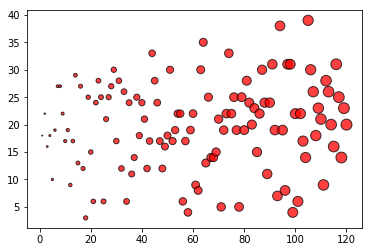

In [53]:
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, dfRideSummaryMerged["totalRides"], marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

In [69]:
groups = dfRideSummaryMerged.groupby('type')

In [ ]:
plt.scatter(dfRideSummaryMerged['totalRides'], dfRideSummaryMerged['avgFare'], c=dfRideSummaryMerged[type])
plt.title('Pyber Ride Sharing Data (2016)', fontsize=14)
plt.xlabel('Total Number of Rides (per City)', fontsize=14)
plt.ylabel('Avergae Fare ($)', fontsize=14)
plt.grid(True)
plt.show()


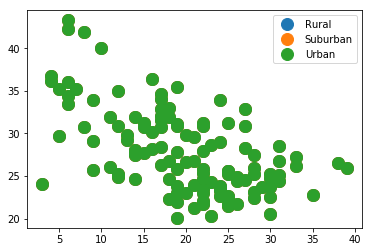

In [83]:
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for type, pear in groups:
    ax.plot(dfRideSummaryMerged['totalRides'], dfRideSummaryMerged['avgFare'], marker='o', linestyle='', ms=12, label=type)
ax.legend()

plt.show()